<a href="https://colab.research.google.com/github/Muhammad-Amir-Shahid/C/blob/master/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Step 1: Define the K-Means algorithm
def k_means(X, K, max_iters=100):
    # Step 2: Initialize centroids randomly
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]

    # Step 3: Create a function to calculate the Euclidean distance
    def euclidean_distance(a, b):
        return np.linalg.norm(a - b)

    # Step 4: Create a function to assign points to the nearest centroid
    def assign_clusters(X, centroids):
        clusters = []
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster = np.argmin(distances)  # The closest centroid
            clusters.append(cluster)
        return np.array(clusters)

    # Step 5: Create a function to update centroids
    def update_centroids(X, clusters, K):
        new_centroids = np.zeros((K, X.shape[1]))
        for k in range(K):
            new_centroids[k] = np.mean(X[clusters == k], axis=0)
        return new_centroids

    # Step 6: K-Means algorithm main loop
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, K)

        # Step 7: Check for convergence (if centroids don't change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, clusters

# Step 8: Example usage
if __name__ == "__main__":
    # Example data (2D)
    X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

    # Set K = 2 (2 clusters)
    K = 2

    # Run K-Means
    centroids, clusters = k_means(X, K)

    print("Centroids:", centroids)
    print("Cluster assignments:", clusters)


Centroids: [[5.5 1. ]
 [5.5 4. ]]
Cluster assignments: [0 1 0 0 1 0]


Final Centroids: [[11.66666667 10.        ]
 [ 2.          2.66666667]
 [ 7.          6.33333333]]
Cluster Assignments: [1 1 1 2 2 2 0 0 0]


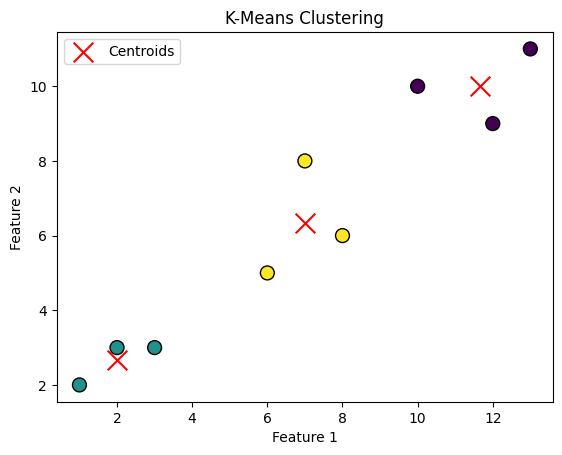

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize K random centroids
def initialize_centroids(X, K):
    np.random.seed(42)
    random_indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[random_indices]
    return centroids

# Step 2: Assign each data point to the nearest centroid
def assign_to_centroids(X, centroids):
    clusters = []
    for point in X:
        distances = np.linalg.norm(point - centroids, axis=1)  # Calculate distance to each centroid
        closest_centroid = np.argmin(distances)  # Index of the closest centroid
        clusters.append(closest_centroid)
    return np.array(clusters)

# Step 3: Recalculate the centroids
def recalculate_centroids(X, clusters, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        centroids[k] = np.mean(X[clusters == k], axis=0)  # Mean of points in the cluster
    return centroids

# Step 4: K-Means algorithm main function
def k_means(X, K, max_iters=100):
    centroids = initialize_centroids(X, K)

    for _ in range(max_iters):
        # Step 2: Assign data points to the nearest centroid
        clusters = assign_to_centroids(X, centroids)

        # Step 3: Recalculate centroids
        new_centroids = recalculate_centroids(X, clusters, K)

        # Step 4: Check for convergence (if centroids don't change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, clusters

if __name__ == "__main__":

    X = np.array([[1, 2], [2, 3], [3, 3], [6, 5], [7, 8], [8, 6], [10, 10], [12, 9], [13, 11]])

    K = 3

    centroids, clusters = k_means(X, K)

    # Output the results
    print("Final Centroids:", centroids)
    print("Cluster Assignments:", clusters)

    # Plotting the data and centroids
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', s=100, edgecolors='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
